# Regression Models

## Goals

In this Assignmnet :

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [1]:
#Your code Here
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [2]:
#Your code Here
#Read the trainig and testing data from the file
trainData = pd.read_csv('trainRegression.csv')
TrD = trainData.head()


### Show Data

In [3]:
#Your code Here
#Show the first 5 rows of the training data
print(TrD)


      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [4]:
#Your code Here
#TypeCast the data into numpy array
x_train = np.array(trainData['X'])
Y_train = np.array(trainData['R'])


### Plot Data

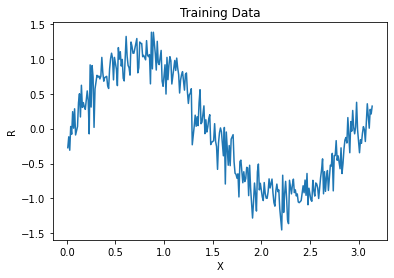

In [5]:
#Your code Here
#Plot your Training Data using matplotlib
plt.plot(x_train, Y_train)
plt.xlabel('X')
plt.ylabel('R')
plt.title('Training Data')
plt.show()


##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [6]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 
#TypeCast the data into numpy array
X_train = np.array(trainData['X']).reshape(-1, 1)
Y_train = np.array(trainData['R']).reshape(-1, 1)
sum_Xtrain = np.sum(X_train)
sum_Ytrain = np.sum(Y_train)
len_Xtrain = len(X_train)
multiplyXYTrain=np.sum(X_train * Y_train)



# Compute the values of A and B matrices
A = np.array([[len_Xtrain, sum_Xtrain], [sum_Xtrain, np.sum(X_train ** 2)]])

B = np.array([[sum_Ytrain], [multiplyXYTrain]])

# Compute the values of theta_0 and theta_1
theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()

print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)












Matrix A = 

 [[283.     444.95  ]
 [444.95   932.7465]]


Matrix B = 

 [[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [7]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1

theta = np.array([[theta_1],[theta_0]])
print("Matrix X for the linear model  :\n\n", theta)


Matrix X for the linear model  :

 [[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [8]:
def fit_regression(X, Y):
    # add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(len(X)), X))

    # calculate the regression coefficients using the normal equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

    return theta
trainData = pd.read_csv('trainRegression.csv')
testData = pd.read_csv('testRegression.csv')

# extract x_train and Y_train from the training data
X_train = np.array(trainData['X'])
Y_train = np.array(trainData['R'])

# extract the test data
test_x = np.array(testData['X'])

# extract the train data
test_y = np.array(trainData['R'])

# fit the model to the training data
theta = fit_regression(X_train, Y_train)

# convert test_x into a 2-dimensional matrix and calculate predicted values of Y
test_x_matrix = np.column_stack((np.ones(len(test_x)), test_x))
test_y_matrix = np.column_stack((np.ones(len(test_y)), test_y))
predicted_Y = np.matmul(test_x_matrix, theta.reshape(-1, 1))
predicted_X = np.matmul(test_y_matrix, theta.reshape(-1, 1))

# print the predicted values of Y
print("Predicted test data \n", predicted_Y)
print("Predicted train data \n", predicted_X)

Predicted test data 
 [[ 0.8736061 ]
 [ 0.81835502]
 [ 0.76310395]
 [ 0.70785287]
 [ 0.6526018 ]
 [ 0.59735072]
 [ 0.54209965]
 [ 0.48684858]
 [ 0.4315975 ]
 [ 0.37634643]
 [ 0.32109535]
 [ 0.26584428]
 [ 0.2105932 ]
 [ 0.15534213]
 [ 0.10009106]
 [ 0.04483998]
 [-0.01041109]
 [-0.06566217]
 [-0.12091324]
 [-0.17616432]
 [-0.23141539]
 [-0.28666646]
 [-0.34191754]
 [-0.39716861]
 [-0.45241969]
 [-0.50767076]
 [-0.56292184]
 [-0.61817291]
 [-0.67342398]
 [-0.72867506]
 [-0.78392613]
 [-0.83917721]]
Predicted train data 
 [[1.02444153]
 [0.93824985]
 [1.04433192]
 [0.85669927]
 [0.91791746]
 [0.73934599]
 [0.87008108]
 [0.71669305]
 [0.92355307]
 [0.85730703]
 [0.66862461]
 [0.59790324]
 [0.7813368 ]
 [0.53049692]
 [0.70564283]
 [0.66751959]
 [0.70232777]
 [0.72111313]
 [0.57525029]
 [0.65094427]
 [0.9149339 ]
 [0.36916379]
 [0.70288028]
 [0.37468889]
 [0.46530066]
 [0.8635504 ]
 [0.55867497]
 [0.4520404 ]
 [0.46474815]
 [0.45756551]
 [0.48021845]
 [0.45867053]
 [0.31004514]
 [0.42993997

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [9]:
#Your code Here
#Using cost function calculate the cost of the model

# Convert test_x to a 2-dimensional numpy array
X_test_2d = np.array(testdata['X']).reshape(-1, 1)

# Add a column of ones to X_test_2d for the intercept term
X_test = np.c_[np.ones(X_test_2d.shape[0]), X_test_2d]

# Calculate the predicted values of y using matrix multiplication
predicted_y = np.dot(X_test, theta)  

# Calculate the Mean Squared Error
MSE = np.mean((testdata['R'] - predicted_y)**2)

print("Mean Squared Error for LINEAR MODEL is :: ", MSE)

NameError: name 'testdata' is not defined

Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

NameError: name 'X_test' is not defined

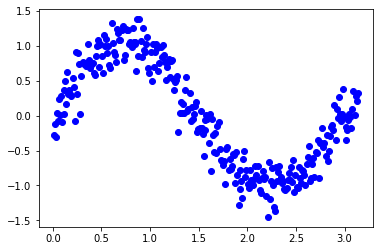

In [10]:
#Your code Here
#Plot the predicted values of y against the test_x

# plot the training data
plt.scatter(X_train, Y_train, color='blue', label='Training Data')



# plot the predicted values of y against the test_x
plt.plot(X_test, Y_pred, color='green', label='Predicted Values')

# set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Model for the train data')
plt.legend()

# display the plot
plt.show()



#Calculate the predicted values of Y for the test data
Y_pred_test = theta_0 + theta_1 * X_test


#plot the test data
plt.scatter(X_test, Y_test, color='blue', label='Test Data')

#plot the predicted values of y against the test_x
plt.plot(X_test, Y_pred_test, color='green', label='Predicted Values')

#set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Model for the test data')
plt.legend()

#display the plot
plt.show()

### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [11]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

A = np.array([[len(X_train), sum_Xtrain, np.sum(X_train ** 2)], 
              [sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3)], 
              [np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4)]])
B = np.array([[sum_Ytrain], [multiplyXYTrain], [np.sum(np.square(X_train)*Y_train)]])

#Compute the values of theta_0, theta_1 and theta_2
theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()


print("\n")
print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)







Matrix A = 

 [[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]


Matrix B = 

 [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [12]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2
#print the coefficients of the quadratic model
theta = np.array([[theta_2], [theta_1], [theta_0]] )
print("Matrix X for the quaderatic model : \n", theta)



Matrix X for the quaderatic model : 
 [[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [13]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y
# Convert test_x into a numpy 2-dimensional matrix
test_X = np.array(test_x).reshape(-1, 1)

# Calculate the predicted values of y using matrix multiplication
y_pred = theta_0 + (theta_1 * test_X) + (theta_2 * np.square(test_X))

# Print the predicted values of y
print("Predicted values of y:")
print(y_pred)



Predicted values of y:
[[ 0.14104585]
 [ 0.05250039]
 [-0.01392277]
 [-0.05822364]
 [-0.08040223]
 [-0.08045852]
 [-0.05839252]
 [-0.01420422]
 [ 0.05210636]
 [ 0.14053923]
 [ 0.25109439]
 [ 0.38377185]
 [ 0.53857159]
 [ 0.71549363]
 [ 0.91453795]
 [ 1.13570457]
 [ 1.37899348]
 [ 1.64440468]
 [ 1.93193817]
 [ 2.24159395]
 [ 2.57337202]
 [ 2.92727238]
 [ 3.30329503]
 [ 3.70143998]
 [ 4.12170721]
 [ 4.56409674]
 [ 5.02860855]
 [ 5.51524266]
 [ 6.02399906]
 [ 6.55487775]
 [ 7.10787872]
 [ 7.68300199]]


### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [14]:
# Calculate the predicted values of Y for the test data
Y_pred = theta_0 + theta_1 * X_test + theta_2 * (np.square(X_test))
# Calculate the MSE cost of the model on the test data
cost = np.mean(np.square(Y_pred - Y_test))

print("Mean Square Error for QUADRATIC MODEL is:", cost)

NameError: name 'X_test' is not defined

Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

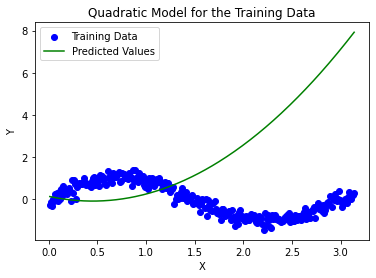

NameError: name 'X_test' is not defined

In [15]:
# Plot the training data
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

# Calculate the predicted values of Y for the training data
Y_pred_train = theta_0 + theta_1 * X_train + theta_2 * np.square(X_train)

# Sort the training data by X values for plotting purposes
sorted_indices_train = X_train.flatten().argsort()
X_train_sorted = X_train[sorted_indices_train]
Y_pred_train_sorted = Y_pred_train[sorted_indices_train]

# Plot the predicted values of Y against the training data
plt.plot(X_train_sorted, Y_pred_train_sorted, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Model for the Training Data')
plt.legend()

# Display the plot
plt.show()

# Calculate the predicted values of Y for the test data
Y_pred_test = theta_0 + theta_1 * X_test + theta_2 * np.square(X_test)

# Sort the test data by X values for plotting purposes
sorted_indices_test = X_test.flatten().argsort()
X_test_sorted = X_test[sorted_indices_test]
Y_pred_test_sorted = Y_pred_test[sorted_indices_test]

# Plot the test data
plt.scatter(X_test, Y_test, color='blue', label='Test Data')

# Plot the predicted values of Y against the test data
plt.plot(X_test_sorted, Y_pred_test_sorted, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Model for the Test Data')
plt.legend()

# Display the plot
plt.show()





### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [16]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

# Compute the values of sum(X_train), sum(X_train ** 2), sum(X_train ** 3), and sum(X_train ** 4)
sum_Xtrain = np.sum(X_train)
sum_Xtrain_squared = np.sum(X_train ** 2)
sum_Xtrain_cubed = np.sum(X_train ** 3)
sum_Xtrain_quart = np.sum(X_train ** 4)

# Construct the matrix A
A = np.array([[len(X_train), sum_Xtrain, sum_Xtrain_squared, sum_Xtrain_cubed],
              [sum_Xtrain, sum_Xtrain_squared, sum_Xtrain_cubed, sum_Xtrain_quart],
              [sum_Xtrain_squared, sum_Xtrain_cubed, sum_Xtrain_quart, np.sum(X_train ** 5)],
              [sum_Xtrain_cubed, sum_Xtrain_quart, np.sum(X_train ** 5), np.sum(X_train ** 6)]])

# Construct the matrix B
B = np.array([[sum_Ytrain],
              [multiplyXYTrain],
              [np.sum(np.square(X_train)*Y_train)],
              [np.sum(np.power(X_train, 3) * Y_train)]])

# Compute the values of theta_0, theta_1, theta_2, and theta_3
theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()


print("\n")
print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)



Matrix A = 

 [[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]


Matrix B = 

 [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [17]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

# print the coefficients of the cubic model
print("Coefficients of the cubic model:")
theta = np.array([[theta_cubic[0]],[theta_cubic[1]], [theta_cubic[2]], [theta_cubic[3]]] )
print("Matrix X for the quaderatic model : \n", theta)

Coefficients of the cubic model:


NameError: name 'theta_cubic' is not defined

Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [18]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y
# Convert the test_x column into a numpy 2-dimensional matrix
X_test = np.array(testData['X']).reshape(-1, 1)

# Add a column of ones to the matrix
X_test = np.hstack((np.ones_like(X_test), X_test, np.square(X_test), np.power(X_test, 3)))

# Calculate the predicted values of y for the test data
Y_pred = np.dot(X_test, theta_cubic)

# Print the predicted values of y for the test data
print("Predicted values of y for the test data using the cubic model:")
print(Y_pred)


NameError: name 'theta_cubic' is not defined

### Mean Square Error

In [19]:
#Your code Here
#Using cost function calculate the cost of the model
# Calculate the predicted values of y for the test data using the cubic model
Y_pred_cubic = theta_cubic[0] + theta_cubic[1] * X_test + theta_cubic[2] * np.square(X_test) + theta_cubic[3] * np.power(X_test, 3)

# Calculate the mean square error for the cubic model
cost_cubic = np.mean(np.square(Y_pred_cubic - Y_test))

print("Mean Square Error for CUBIC MODEL is:", cost_cubic)

NameError: name 'theta_cubic' is not defined

Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

In [20]:
#Your code Here
#Plot the predicted values of y against the test_x
# Plot the training data
theta_cubic = theta_cubic.reshape(-1, 1)
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

# Plot the predicted values of y against the train_x
Y_pred_train = theta_cubic[0][0] + theta_cubic[1][0] * X_train + theta_cubic[2][0] * np.square(X_train) + theta_cubic[3][0] * np.power(X_train, 3)
plt.plot(X_train, Y_pred_train, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Model for the train data')
plt.legend()

# Display the plot
plt.show()

# Calculate the predicted values of y for the test data using the cubic model
Y_pred_test = theta_cubic[0][0] + theta_cubic[1][0] * X_test + theta_cubic[2][0] * np.square(X_test) + theta_cubic[3][0] * np.power(X_test, 3)

# Plot the test data
plt.scatter(X_test, Y_test, color='blue', label='Test Data')

# Plot the predicted values of y against the test_x
plt.plot(X_test, Y_pred_test, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Model for the test data')
plt.legend()

# Display the plot
plt.show()

NameError: name 'theta_cubic' is not defined

### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

In [21]:
#Your code Here
# Generate additional features for X_train

# Calculate the values of A and B matrix
sum_Xtrain = np.sum(X_train)
sum_Ytrain = np.sum(Y_train)
multiplyXYTrain = np.sum(np.multiply(X_train, Y_train))

A = np.array([[len(X_train), sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4)],
              [sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5)],
              [np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6)],
              [np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7)],
              [np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8)]])

B = np.array([[sum_Ytrain], [multiplyXYTrain], [np.sum(np.square(X_train)*Y_train)],
              [np.sum(np.power(X_train, 3)*Y_train)], [np.sum(np.power(X_train, 4)*Y_train)]])

# Compute the values of theta_0, theta_1, theta_2, theta_3, and theta_4
theta_4, theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()
print("\n")
print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)































Matrix A = 

 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]


Matrix B = 

 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]


In [22]:
# Compute the values of theta_0, theta_1, theta_2, and theta_3, theta_4
thet_4,theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()

theta = np.array([[theta_cubic[0]],[theta_cubic[1]], [theta_cubic[2]], [theta_cubic[3]]] )
print("Matrix X for the quaderatic model : \n", theta)


NameError: name 'theta_cubic' is not defined

In [23]:
X_test = np.array(testData['X']).reshape(-1, 1)

# Add a column of ones to the matrix
X_test = np.hstack((np.ones_like(X_test), X_test, np.square(X_test), np.power(X_test, 3), np.power(X_test, 4)))

# Calculate the predicted values of y for the test data
Y_pred = np.dot(X_test, np.array([[theta_0],[theta_1],[theta_2],[theta_3],[theta_4]]))

# Print the predicted values of y for the test data
print("Predicted values of y for the test data using the degree 4 model:")
print(Y_pred)







Predicted values of y for the test data using the degree 4 model:
[[-1.56329156e-01]
 [-2.72363676e-02]
 [ 1.78421167e-02]
 [ 9.43046453e-03]
 [-2.29261034e-02]
 [-5.06613136e-02]
 [-4.61878403e-02]
 [ 1.71026952e-02]
 [ 1.64839724e-01]
 [ 4.21673730e-01]
 [ 8.11276250e-01]
 [ 1.35633987e+00]
 [ 2.07857824e+00]
 [ 2.99872605e+00]
 [ 4.13653904e+00]
 [ 5.51079401e+00]
 [ 7.13928883e+00]
 [ 9.03884238e+00]
 [ 1.12252946e+01]
 [ 1.37135066e+01]
 [ 1.65173603e+01]
 [ 1.96497590e+01]
 [ 2.31226266e+01]
 [ 2.69469086e+01]
 [ 3.11325711e+01]
 [ 3.56886015e+01]
 [ 4.06230081e+01]
 [ 4.59428204e+01]
 [ 5.16540889e+01]
 [ 5.77618851e+01]
 [ 6.42703015e+01]
 [ 7.11824519e+01]]


IndexError: invalid index to scalar variable.

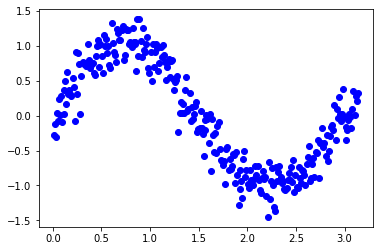

In [24]:
# Plot the training data
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
# Plot the predicted values of y against the train_x
if theta_4.ndim == 2:
    Y_pred_train = theta_4[0][0] + theta_4[1][0] * X_train + theta_4[2][0] * np.square(X_train) + theta_4[3][0] * np.power(X_train, 3) + theta_4[4][0] * np.power(X_train, 4)
else:
    Y_pred_train = theta_4[0] + theta_4[1] * X_train + theta_4[2] * np.square(X_train) + theta_4[3] * np.power(X_train, 3) + theta_4[4] * np.power(X_train, 4)

plt.scatter(X_train, Y_train, color='red', label='Training Data')
plt.plot(X_train, Y_pred_train, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 4 Model for the Training Data')
plt.legend()

# Display the plot
plt.show()

# Modify the indexing of theta_4 to ensure it is a 2D array
if theta_4.ndim == 2:
    Y_pred_test = theta_4[0][0] + theta_4[1][0] * X_test + theta_4[2][0] * np.square(X_test) + theta_4[3][0] * np.power(X_test, 3) + theta_4[4][0] * np.power(X_test, 4)
else:
    Y_pred_test = theta_4[0] + theta_4[1] * X_test + theta_4[2] * np.square(X_test) + theta_4[3] * np.power(X_test, 3) + theta_4[4] * np.power(X_test, 4)

# Plot the test data
plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.plot(X_test, Y_pred_test, color='green', label='Predicted Values')

# Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 4 Model for the Test Data')
plt.legend()

# Display the plot
plt.show()




## Now Fit The 5 degree Model

In [25]:
#Your code Here

A = np.array([[len(X_train), sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5)],
[sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6)],
[np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7)],
[np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8)],
[np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9)],
[np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9), np.sum(X_train ** 10)]])

B = np.array([[sum_Ytrain], [multiplyXYTrain], [np.sum(np.square(X_train)*Y_train)],
[np.sum(np.power(X_train, 3)*Y_train)], [np.sum(np.power(X_train, 4)*Y_train)], [np.sum(np.power(X_train, 5)*Y_train)]])

#Compute the values of theta_0, theta_1, theta_2, theta_3, theta_4, and theta_5
theta_5, theta_4, theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()
print("\n")
print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)


















Matrix A = 

 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]


Matrix B = 

 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]


In [26]:
# Compute the values of theta_0, theta_1, theta_2, theta_3, and theta_4
theta_5, theta_4, theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()

theta = np.array([[theta_5], [theta_4], [theta_3], [theta_2], [theta_1], [theta_0]])
print("Matrix X for the degree 5 model: \n", theta)

Matrix X for the degree 5 model: 
 [[-0.15135453]
 [ 2.89713972]
 [-0.36242335]
 [-2.76674175]
 [ 1.48161173]
 [-0.20822932]]


In [27]:
X_test = np.array(testData['X']).reshape(-1, 1)

#Add a column of ones to the matrix
X_test = np.hstack((np.ones_like(X_test), X_test, np.square(X_test), np.power(X_test, 3), np.power(X_test, 4), np.power(X_test, 5)))

#Calculate the predicted values of y for the test data
Y_pred = np.dot(X_test, np.array([[theta_0], [theta_1], [theta_2], [theta_3], [theta_4], [theta_5]]))

#Print the predicted values of y for the test data
print("Predicted values of y for the test data using the degree 5 model:")
print(Y_pred)

Predicted values of y for the test data using the degree 5 model:
[[-2.08229324e-01]
 [-8.78097920e-02]
 [-2.08890455e-02]
 [ 5.61046171e-04]
 [-8.84150148e-03]
 [-2.80704139e-02]
 [-2.98727830e-02]
 [ 1.90493074e-02]
 [ 1.57857156e-01]
 [ 4.31393820e-01]
 [ 8.90002486e-01]
 [ 1.58934485e+00]
 [ 2.59021949e+00]
 [ 3.95838023e+00]
 [ 5.76435453e+00]
 [ 8.08326186e+00]
 [ 1.09946321e+01]
 [ 1.45822238e+01]
 [ 1.89338426e+01]
 [ 2.41411599e+01]
 [ 3.02995308e+01]
 [ 3.75078125e+01]
 [ 4.58681832e+01]
 [ 5.54859597e+01]
 [ 6.64694164e+01]
 [ 7.89296035e+01]
 [ 9.29801651e+01]
 [ 1.08737158e+02]
 [ 1.26318870e+02]
 [ 1.45845638e+02]
 [ 1.67439666e+02]
 [ 1.91224844e+02]]


In [28]:




X_train_reshaped = X_train.reshape(-1, 1)
X_train_poly5 = poly5.fit_transform(X_train_reshaped)


# Fit a degree 5 polynomial to the training data
poly5 = PolynomialFeatures(degree=5)
X_train_poly5 = poly5.fit_transform(X_train)
theta_poly5 = np.linalg.inv(X_train_poly5.T.dot(X_train_poly5)).dot(X_train_poly5.T).dot(Y_train)

# Plot the predicted values of y against the train_x
Y_pred_train_poly5 = np.zeros_like(Y_train)
for i in range(theta_poly5.shape[0]):
    Y_pred_train_poly5 += theta_poly5[i][0] * np.power(X_train, i)
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.plot(X_train, Y_pred_train_poly5, color='green', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 5 Polynomial Model for the Train Data')
plt.legend()
plt.show()

# Calculate the predicted values of y for the test data using the degree 5 polynomial model
X_test_poly5 = poly5.fit_transform(X_test)
Y_pred_test_poly5 = np.zeros_like(Y_test)
for i in range(theta_poly5.shape[0]):
    Y_pred_test_poly5 += theta_poly5[i][0] * np.power(X_test, i)

# Plot the predicted values of y against the test_x
plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.plot(X_test, Y_pred_test_poly5, color='green', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 5 Polynomial Model for the Test Data')
plt.legend()
plt.show()


NameError: name 'poly5' is not defined

## Now Fit The 6 degree Model

In [29]:
#Your code Here
# Generate additional features for X_train

# Calculate the values of A and B matrix
sum_Xtrain = np.sum(X_train)
sum_Ytrain = np.sum(Y_train)
multiplyXYTrain = np.sum(np.multiply(X_train, Y_train))

A = np.array([[len(X_train), sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6)],
              [sum_Xtrain, np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7)],
              [np.sum(X_train ** 2), np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8)],
              [np.sum(X_train ** 3), np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9)],
              [np.sum(X_train ** 4), np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9), np.sum(X_train ** 10)],
              [np.sum(X_train ** 5), np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9), np.sum(X_train ** 10), np.sum(X_train ** 11)],
              [np.sum(X_train ** 6), np.sum(X_train ** 7), np.sum(X_train ** 8), np.sum(X_train ** 9), np.sum(X_train ** 10), np.sum(X_train ** 11), np.sum(X_train ** 12)]])

B = np.array([[sum_Ytrain], [multiplyXYTrain], [np.sum(np.square(X_train)*Y_train)],
              [np.sum(np.power(X_train, 3)*Y_train)], [np.sum(np.power(X_train, 4)*Y_train)],
              [np.sum(np.power(X_train, 5)*Y_train)], [np.sum(np.power(X_train, 6)*Y_train)]])

# Compute the values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 and theta_6
theta_6, theta_5, theta_4, theta_3, theta_2, theta_1, theta_0 = np.linalg.inv(A).dot(B).flatten()
print("\n")
print("Matrix A = \n\n", A)
print("\n")
print("Matrix B = \n\n", B)












Matrix A = 

 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]


Matrix B = 

 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]


In [30]:

theta = np.array([[theta_6], [theta_5], [theta_4], [theta_3], [theta_2], [theta_1], [theta_0]])
print("Matrix X for the degree 6 model: \n", theta)

Matrix X for the degree 6 model: 
 [[-0.12883598]
 [ 2.59932802]
 [ 0.58098511]
 [-3.96416677]
 [ 2.19455082]
 [-0.40752775]
 [ 0.02110818]]


In [31]:
X_test = np.array(testData['X']).reshape(-1, 1)

#Add a column of ones to the matrix
X_test = np.hstack((np.ones_like(X_test), X_test, np.square(X_test), np.power(X_test, 3), np.power(X_test, 4), np.power(X_test, 5), np.power(X_test, 6)))

#Calculate the predicted values of y for the test data
Y_pred = np.dot(X_test, np.array([[theta_0], [theta_1], [theta_2], [theta_3], [theta_4], [theta_5], [theta_6]]))

#Print the predicted values of y for the test data
print("Predicted values of y for the test data using the degree 6 model:")
print(Y_pred)

Predicted values of y for the test data using the degree 6 model:
[[ 2.11081782e-02]
 [-1.57929285e-03]
 [-2.57555828e-03]
 [ 2.55348267e-04]
 [-3.51883946e-03]
 [-1.40113315e-02]
 [-1.82217545e-02]
 [ 1.26656128e-02]
 [ 1.25890843e-01]
 [ 3.89634603e-01]
 [ 8.95441629e-01]
 [ 1.76055145e+00]
 [ 3.13013633e+00]
 [ 5.17944649e+00]
 [ 8.11586251e+00]
 [ 1.21808550e+01]
 [ 1.76518516e+01]
 [ 2.48440108e+01]
 [ 3.41119039e+01]
 [ 4.58511031e+01]
 [ 6.04996776e+01]
 [ 7.85395967e+01]
 [ 1.00498040e+02]
 [ 1.26948615e+02]
 [ 1.58512482e+02]
 [ 1.95859387e+02]
 [ 2.39708599e+02]
 [ 2.90829758e+02]
 [ 3.50043628e+02]
 [ 4.18222759e+02]
 [ 4.96292055e+02]
 [ 5.85229248e+02]]


IndexError: index 1 is out of bounds for axis 0 with size 1

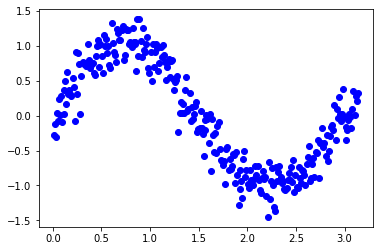

In [32]:
theta_6 = theta_6.reshape(-1, 1)
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

#Plot the predicted values of y against the train_x
Y_pred_train = theta_6[0][0] + theta_6[1][0] * X_train + theta_6[2][0] * np.square(X_train) + theta_6[3][0] * np.power(X_train, 3) + theta_6[4][0] * np.power(X_train, 4) + theta_6[5][0] * np.power(X_train, 5) + theta_6[6][0] * np.power(X_train, 6)
plt.plot(X_train, Y_pred_train, color='green', label='Predicted Values')

#Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 6 Model for the train data')
plt.legend()

#Display the plot
plt.show()

#Calculate the predicted values of y for the test data using the degree 6 model
Y_pred_test = theta_6[0][0] + theta_6[1][0] * X_test + theta_6[2][0] * np.square(X_test) + theta_6[3][0] * np.power(X_test, 3) + theta_6[4][0] * np.power(X_test, 4) + theta_6[5][0] * np.power(X_test, 5) + theta_6[6][0] * np.power(X_test, 6)

#Plot the test data
plt.scatter(X_test, Y_test, color='blue', label='Test Data')

#Plot the predicted values of y against the test_x
plt.plot(X_test, Y_pred_test, color='green', label='Predicted Values')

#Set the labels and title of the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Degree 6 Model for the test data')
plt.legend()

#Display the plot
plt.show()

### Comment on the results by comparing all of your models

In [33]:
#Degree 6 Model is much better than previous ones in form of data expression and display